# Hopfield Networks

## Imports and Helper Functions

In [8]:
import numpy as np
from matplotlib import pyplot as plt
import math as m
import pickle
import sys
from matplotlib.animation import FuncAnimation
import train_imgs
import time as t
from  matplotlib.animation import FuncAnimation

In [2]:
def corrupt_img(img, k, return_flat=False):
    img = img.flatten()
    rands = np.random.permutation(img.shape[0])[:k]
    img[rands] = img[rands]*-1
    if return_flat: return img
    return img.reshape(10, 10)

In [3]:
def hamming_distance(a, b):
    return int(sum((a*b-1)/(-2)))

## Hopfield Class

In [25]:
class Hopfield():
    
    def __init__(self, L, training=0, s=0, random=False):
        self.L = L
        self.n = int(L**2)
        if type(s)==int:
            self.s = np.random.choice([-1, 1], size=self.n)
        else:
            self.s = s.flatten()
        self.bias = 2*np.random.rand(self.n) - 1
        if random:
            init_w = 2*np.random.rand(self.n, self.n) - 1
            self.w = (init_w + init_w.T)/2
            np.fill_diagonal(self.w, 0)
        else:
            self.set_weights(training)
        self.energy = self.calc_energy()
        self.energy_history = [self.energy]
        self.state_history = [self.s.flatten()]
    
    ## Calculates the energy of the current state
    def calc_energy(self):
        return -(1/2)*self.s.T@self.w@self.s + self.bias.T@self.s
    
    ## Calculates the enegry of a pt in the current state
    def E_current(self, pt):
        return -(1/2)*self.s[pt]*self.w[pt]@self.s+self.bias[pt]*self.s[pt]
    
    ## Runs the sweeps
    def run(self, sweeps, plot_results=False, record_each_pt=False):
        for sweep in range(sweeps): 
            points = np.random.randint(self.n, size=[self.n])
            for pt in points:
                E = self.E_current(pt)
                if E > 0:
                    self.s[pt] = self.s[pt]*-1
                    self.energy += -2*E
                if record_each_pt:
                    self.state_history.append(self.s.flatten())
            self.energy_history.append(self.energy)
            if not record_each_pt:
                self.state_history.append(self.s.flatten())
        if plot_results: self.show()
        return self.s
    
    def set_weights(self, imgs, manual=False):
        if manual:
            self.w = imgs
            return self.w
        m = imgs.shape[0]
        imgs = np.array([img.flatten() for img in imgs])
        self.w = (1/m) * sum([np.outer(img, img) for img in imgs])
        return self.w

    def show(self, return_self=False):
        plt.figure()
        plt.matshow(self.s.reshape(self.L, self.L), cmap='gray')
        plt.show()
        if return_self: return self.s
        
    def set_state(self, state):
        self.s = state.flatten()

## Testing Hopfield

## Grading

### Seeing that the "energy" goes down during a run

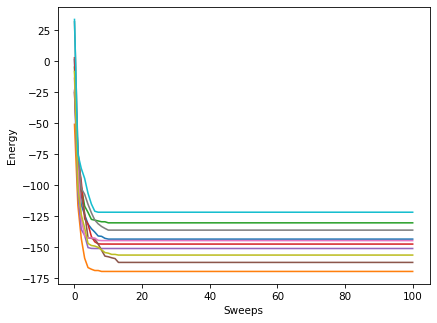

In [5]:
energies = []
for i in range(10):
    testing = Hopfield(10, random=True)
    testing.run(100)
    energies.append(testing.energy_history)
plt.figure(dpi=75)
for i in range(len(energies)):
    plt.plot(energies[i])
plt.xlabel("Sweeps")
plt.ylabel("Energy")
plt.show()

### Training some inputs

<Figure size 640x480 with 0 Axes>

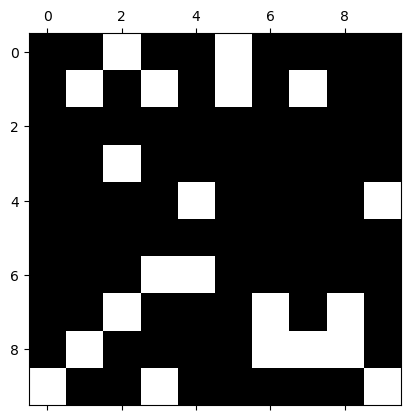

<Figure size 640x480 with 0 Axes>

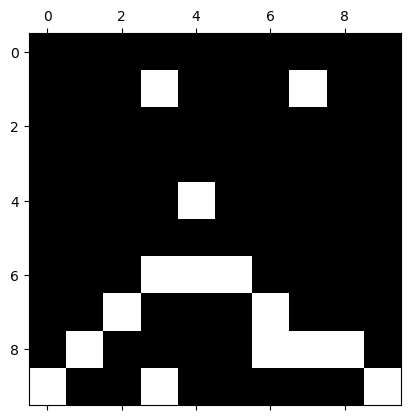

<Figure size 640x480 with 0 Axes>

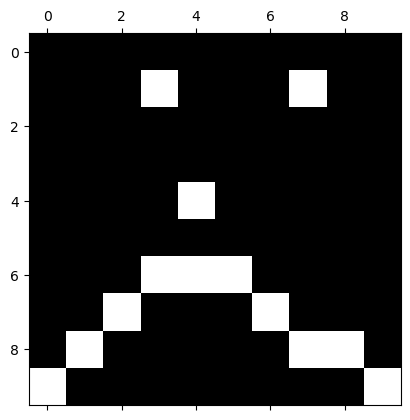

<Figure size 640x480 with 0 Axes>

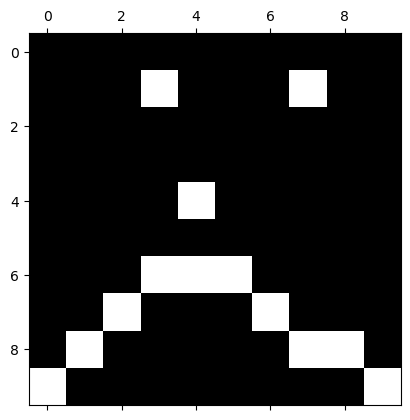

<Figure size 640x480 with 0 Axes>

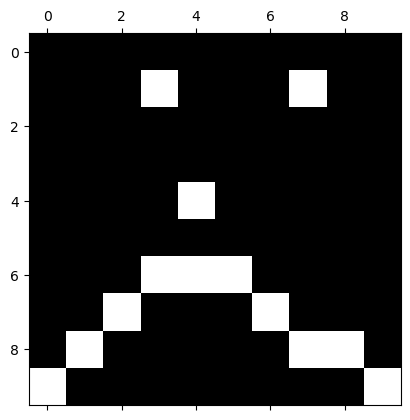

In [7]:
testing = Hopfield(10, np.array([train_imgs.make_face(), train_imgs.make_tree()]))
testing.set_state(corrupt_img(train_imgs.make_face(), 10))
testing.show()
testing.run(1, True);
testing.run(1, True);
testing.run(1, True);
testing.run(1, True);

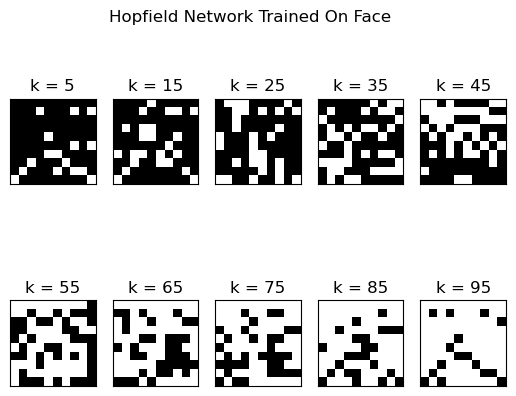

[====================] 100%

In [20]:
data = []
n_frames = 20
ks = [5, 15, 25, 35, 45, 55, 65, 75, 85, 95]
for k in ks:
    testing = Hopfield(10, np.array([train_imgs.make_face()]))
    testing.set_state(corrupt_img(train_imgs.make_face(), k))
    this_run = [np.copy(testing.s.reshape(10, 10))]
    for i in range(n_frames-1):
        this_run.append(np.copy(testing.run(1).reshape(10, 10)))
    data.append(this_run)
    
fig, axs = plt.subplots(2, 5)
fig.suptitle(f"Hopfield Network Trained On Face")
for i in range(2):
    for j in range(5):
        idx = i*5 + j
        axs[i, j].matshow(data[idx][0], cmap="gray", animated=True)
        axs[i, j].set_title(f"k = {ks[idx]}")
        axs[i, j].tick_params(top=False, labeltop=False, left = False, right = False , labelleft = False , labelbottom = False, bottom = False)
plt.show()

def update(frame):
    sys.stdout.write('\r')
    per = (frame + 1) / n_frames
    sys.stdout.write("[%-20s] %d%%" % ('='*int(20*per), 100*per))
    sys.stdout.flush()
    for i in range(2):
        for j in range(5):
            axs[i, j].matshow(data[i*5 + j][frame], cmap="gray", animated=True)
    return [fig]

anim = FuncAnimation(fig, update, frames=n_frames, interval = 1, repeat=True, cache_frame_data=False)
anim.save(f"Hopfield_Smiles.gif")
plt.show()

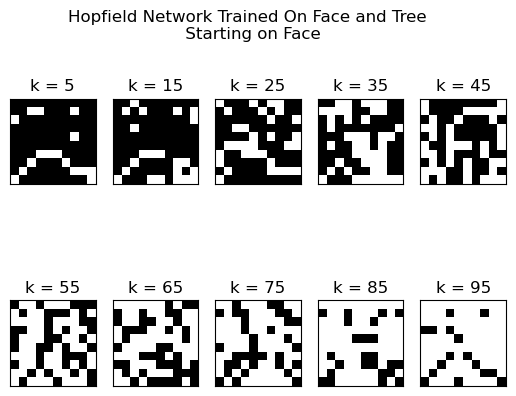

[====================] 100%

In [23]:
data = []
n_frames = 10
ks = [5, 15, 25, 35, 45, 55, 65, 75, 85, 95]
for k in ks:
    testing = Hopfield(10, np.array([train_imgs.make_face(), train_imgs.make_tree()]))
    testing.set_state(corrupt_img(train_imgs.make_face(), k))
    this_run = [np.copy(testing.s.reshape(10, 10))]
    for i in range(n_frames-1):
        this_run.append(np.copy(testing.run(1).reshape(10, 10)))
    data.append(this_run)
    
fig, axs = plt.subplots(2, 5)
fig.suptitle(f"Hopfield Network Trained On Face and Tree \n Starting on Face")
for i in range(2):
    for j in range(5):
        idx = i*5 + j
        axs[i, j].matshow(data[idx][0], cmap="gray", animated=True)
        axs[i, j].set_title(f"k = {ks[idx]}")
        axs[i, j].tick_params(top=False, labeltop=False, left = False, right = False , labelleft = False , labelbottom = False, bottom = False)
plt.show()

def update(frame):
    sys.stdout.write('\r')
    per = (frame + 1) / n_frames
    sys.stdout.write("[%-20s] %d%%" % ('='*int(20*per), 100*per))
    sys.stdout.flush()
    for i in range(2):
        for j in range(5):
            axs[i, j].matshow(data[i*5 + j][frame], cmap="gray", animated=True)
    return [fig]

anim = FuncAnimation(fig, update, frames=n_frames, interval = 500, repeat=True, cache_frame_data=False)
anim.save(f"Hopfield_Smiles1.gif")
plt.show()

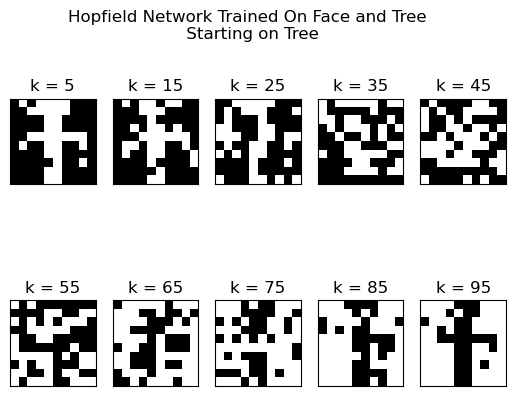

[====================] 100%

In [24]:
data = []
n_frames = 10
ks = [5, 15, 25, 35, 45, 55, 65, 75, 85, 95]
for k in ks:
    testing = Hopfield(10, np.array([train_imgs.make_face(), train_imgs.make_tree()]))
    testing.set_state(corrupt_img(train_imgs.make_tree(), k))
    this_run = [np.copy(testing.s.reshape(10, 10))]
    for i in range(n_frames-1):
        this_run.append(np.copy(testing.run(1).reshape(10, 10)))
    data.append(this_run)
    
fig, axs = plt.subplots(2, 5)
fig.suptitle(f"Hopfield Network Trained On Face and Tree \n Starting on Tree")
for i in range(2):
    for j in range(5):
        idx = i*5 + j
        axs[i, j].matshow(data[idx][0], cmap="gray", animated=True)
        axs[i, j].set_title(f"k = {ks[idx]}")
        axs[i, j].tick_params(top=False, labeltop=False, left = False, right = False , labelleft = False , labelbottom = False, bottom = False)
plt.show()

def update(frame):
    sys.stdout.write('\r')
    per = (frame + 1) / n_frames
    sys.stdout.write("[%-20s] %d%%" % ('='*int(20*per), 100*per))
    sys.stdout.flush()
    for i in range(2):
        for j in range(5):
            axs[i, j].matshow(data[i*5 + j][frame], cmap="gray", animated=True)
    return [fig]

anim = FuncAnimation(fig, update, frames=n_frames, interval = 500, repeat=True, cache_frame_data=False)
anim.save(f"Hopfield_Smiles2.gif")
plt.show()

(10, 1001, 100)


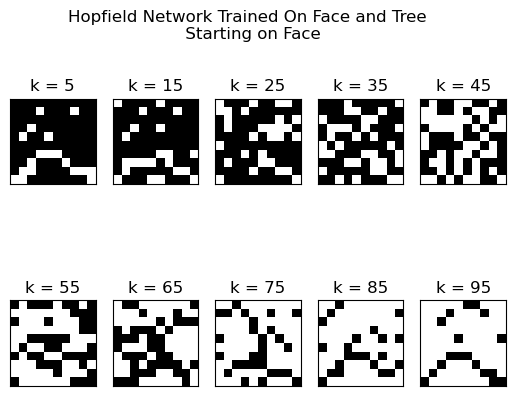

[====================] 100%

In [30]:
data = []
n_frames = 1001
ks = [5, 15, 25, 35, 45, 55, 65, 75, 85, 95]
for k in ks:
    testing = Hopfield(10, np.array([train_imgs.make_face(), train_imgs.make_tree()]), s=corrupt_img(train_imgs.make_face(), k))
    testing.run(int((n_frames-1)/100), record_each_pt=True)
    data.append(np.copy(testing.state_history))
data = np.array(data)
print(data.shape)
fig, axs = plt.subplots(2, 5)
fig.suptitle(f"Hopfield Network Trained On Face and Tree \n Starting on Face")
for i in range(2):
    for j in range(5):
        idx = i*5 + j
        axs[i, j].matshow(data[idx][0].reshape(10,10), cmap="gray", animated=True)
        axs[i, j].set_title(f"k = {ks[idx]}")
        axs[i, j].tick_params(top=False, labeltop=False, left = False, right = False , labelleft = False , labelbottom = False, bottom = False)
plt.show()

def update(frame):
    sys.stdout.write('\r')
    per = (frame + 1) / n_frames
    sys.stdout.write("[%-20s] %d%%" % ('='*int(20*per), 100*per))
    sys.stdout.flush()
    for i in range(2):
        for j in range(5):
            axs[i, j].matshow(data[i*5 + j][frame].reshape(10,10), cmap="gray", animated=True)
    return [fig]

anim = FuncAnimation(fig, update, frames=n_frames, interval = 25, repeat=True, cache_frame_data=False)
anim.save(f"Hopfield_Smiles3.gif")
plt.show()

### How many memories can you remember?

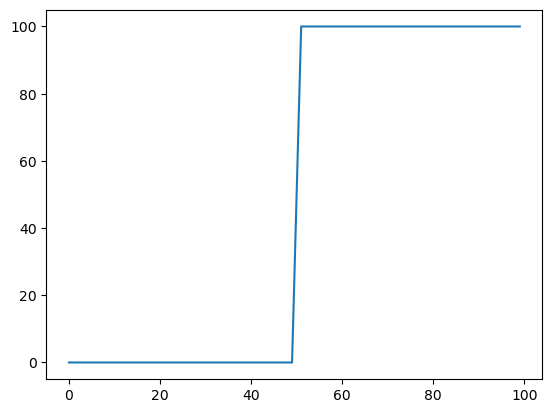

In [171]:
dis = np.zeros(100)
acc = 10
img = np.random.choice([-1, 1], size=100)
for k in range(100):
    avg = 0
    for i in range(acc):
        init = corrupt_img(img, k)
        testing = Hopfield(10, training=np.array([img]), s=init)
        testing.run(100)
        avg += hamming_distance(testing.s, img)/acc
    dis[k] = avg
plt.plot(dis)

In [183]:
def produce_hamming_matrix(max_p, acc=10, sweeps=20, max_k=100, L=10):
    n = L**2
    memories = np.random.choice([-1, 1], size=n*max_p).reshape(max_p, n)
    to_return = np.zeros((max_k, max_p-1))
    p_times = []
    for p in range(max_p-1):
        print(f"{p+1}/{max_p}")
        start = t.time()
        mems = memories[:p+1]
        for k in range(max_k):
            ind = np.random.randint(p+1, size=[acc])
            avg = 0
            for i in range(acc):
                img = mems[ind][i]
                network = Hopfield(L, training=mems, s=corrupt_img(img, k))
                network.run(sweeps)
                avg += hamming_distance(network.s, img)/acc
            to_return[k, p] = avg
        p_time = start - t.time()
        p_times.append(p_time)
        plt.figure()
        plt.plot(p_times)
        plt.show()
    return to_return

1/100


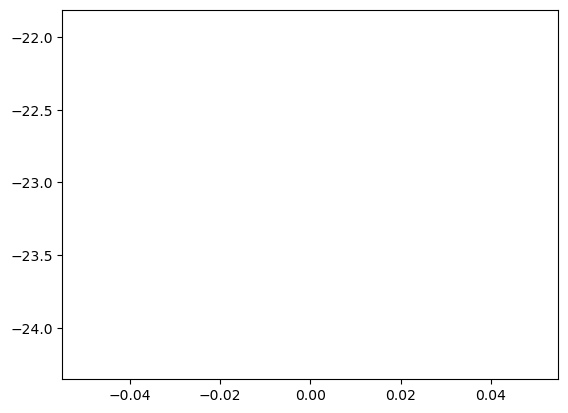

2/100


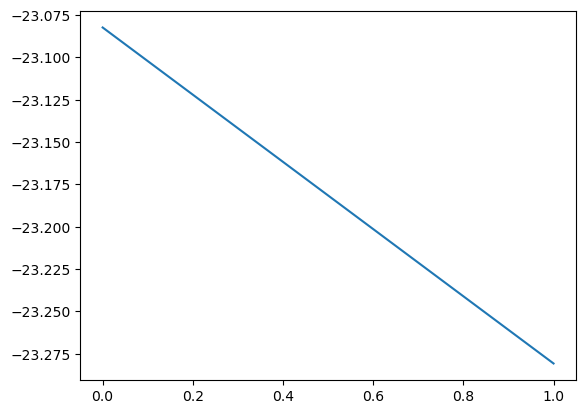

3/100


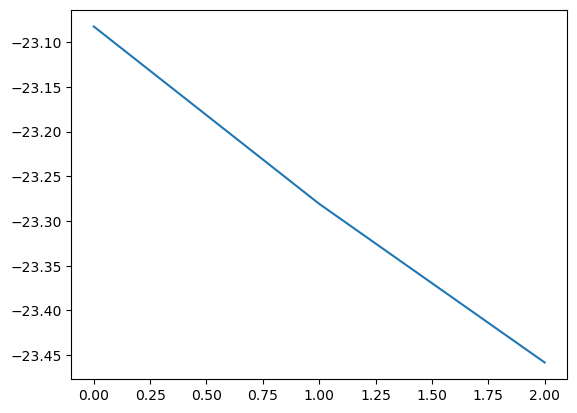

4/100


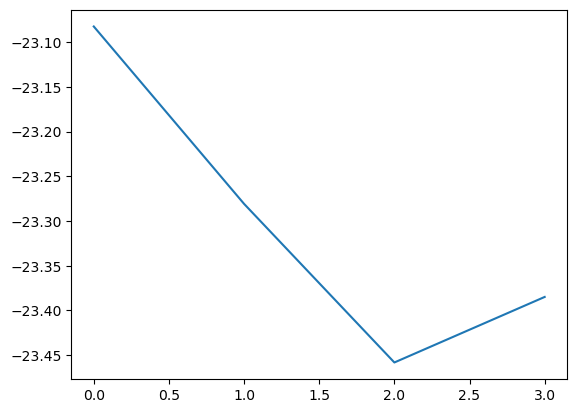

5/100


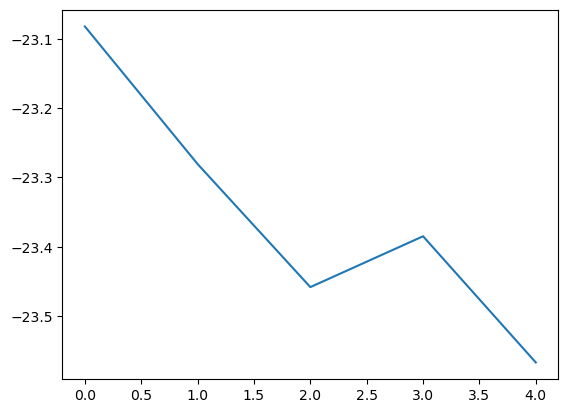

6/100


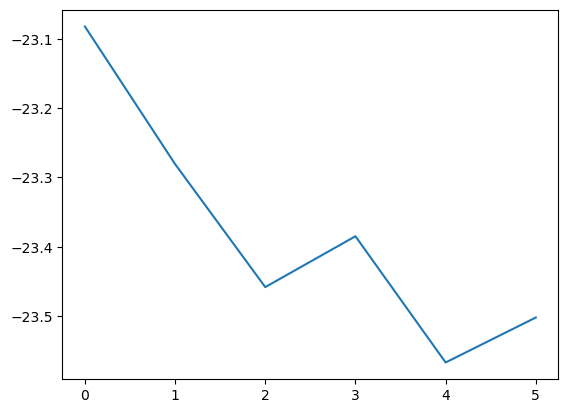

7/100


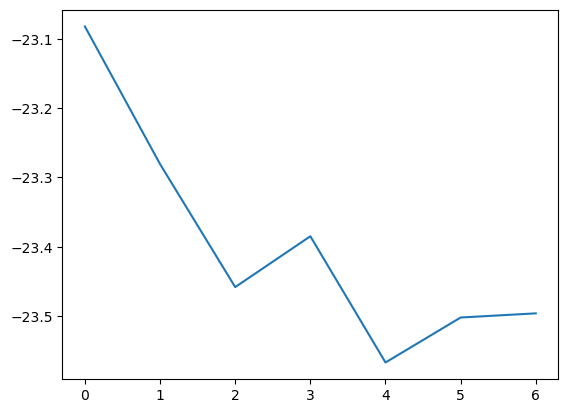

8/100


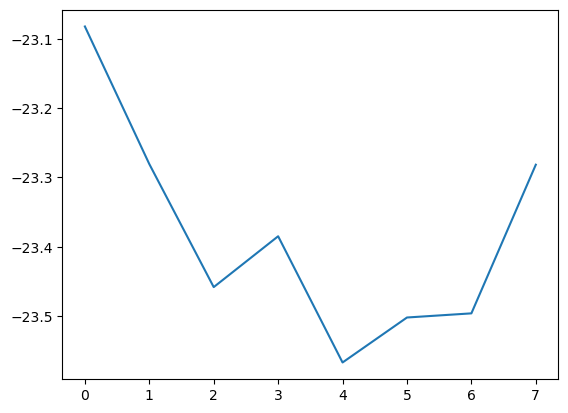

9/100


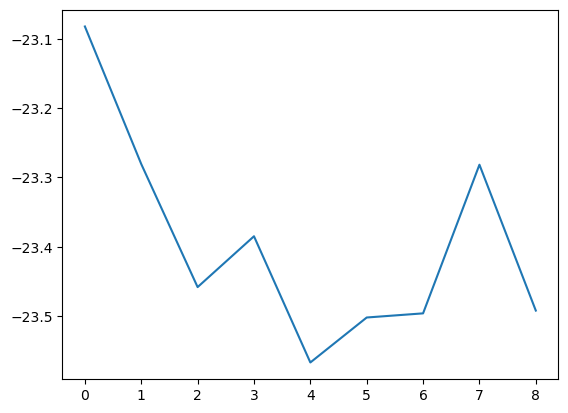

10/100


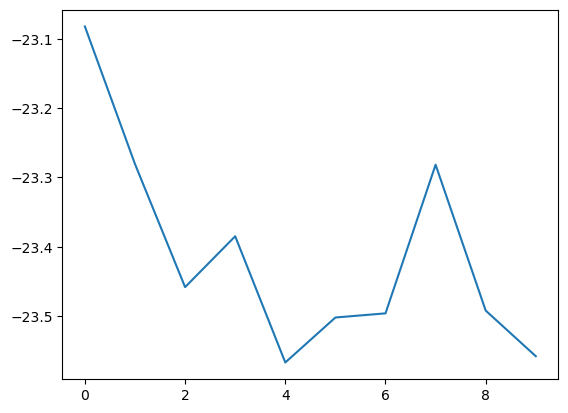

11/100


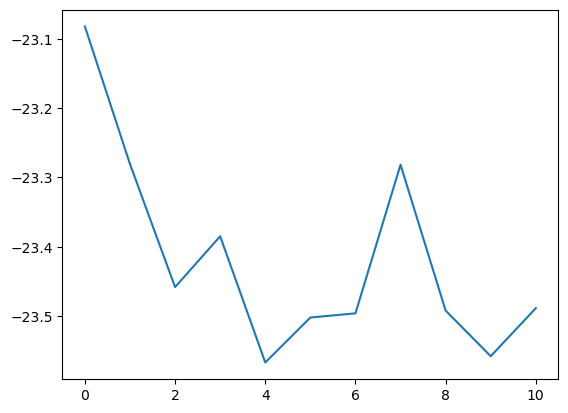

12/100


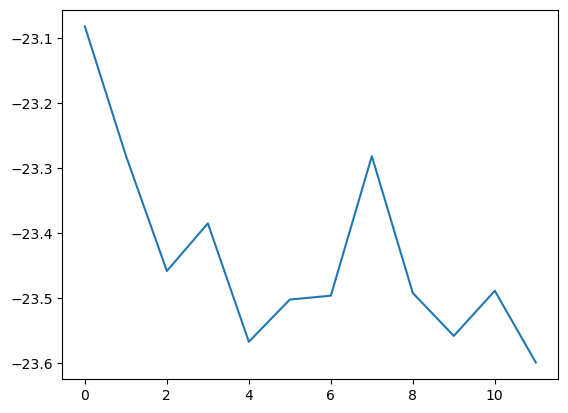

13/100


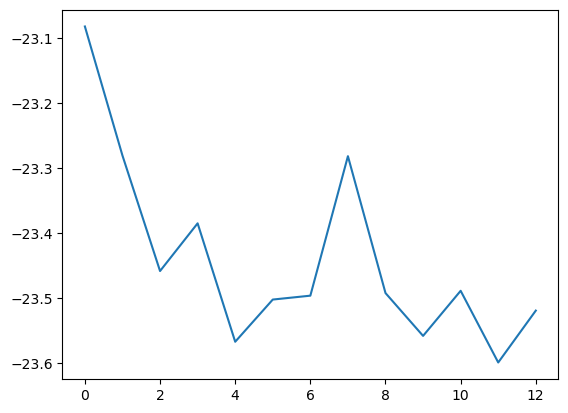

14/100


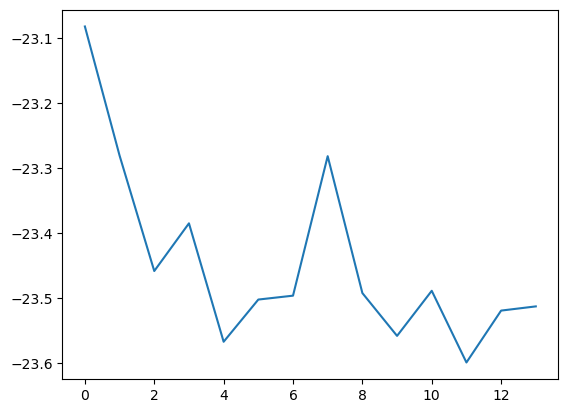

15/100


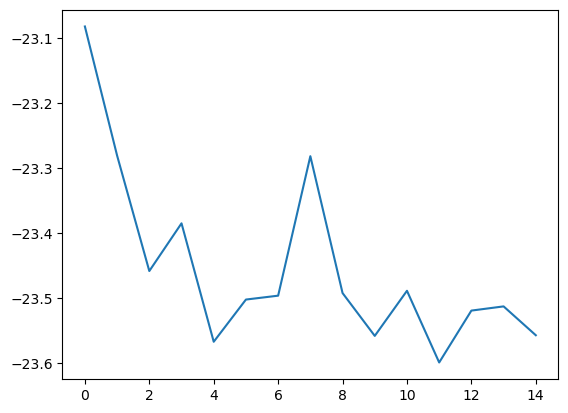

16/100


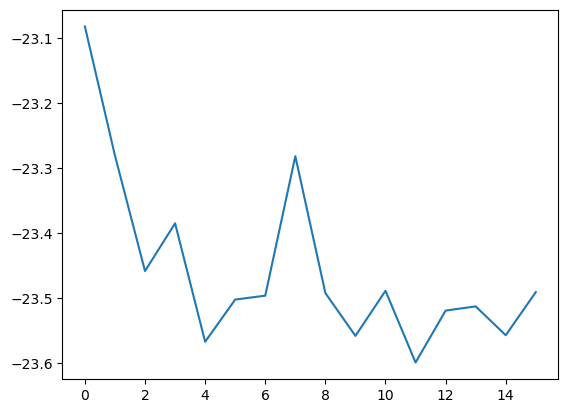

17/100


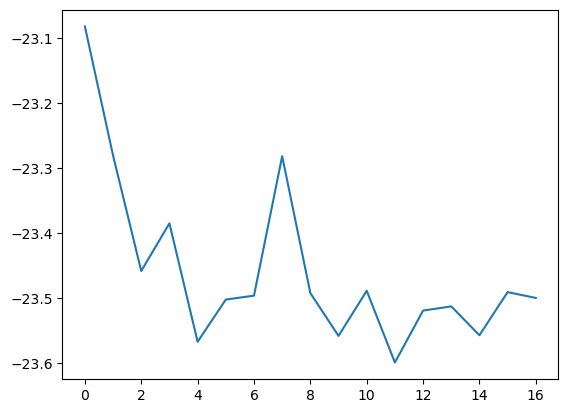

18/100


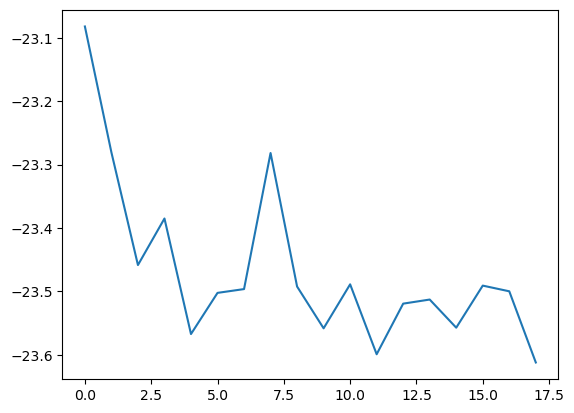

19/100


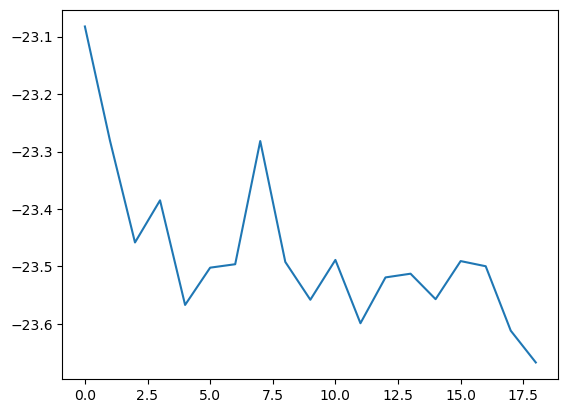

20/100


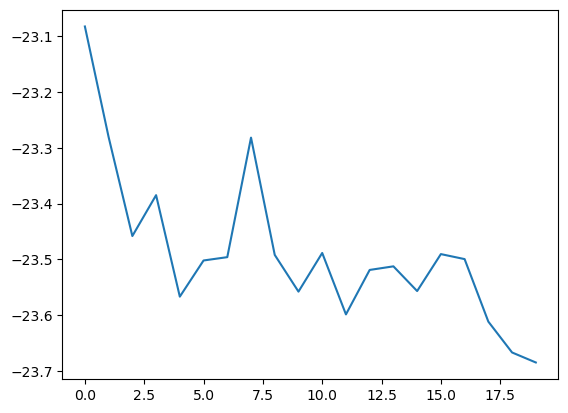

21/100


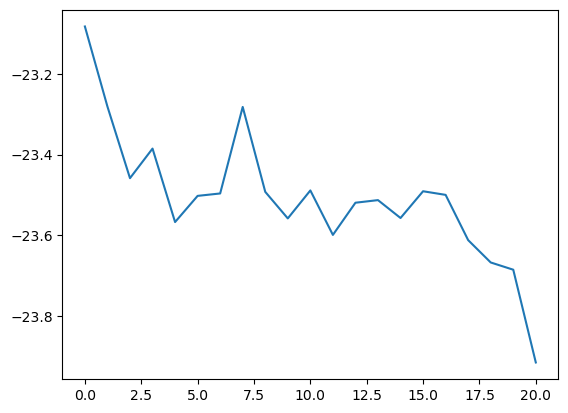

22/100


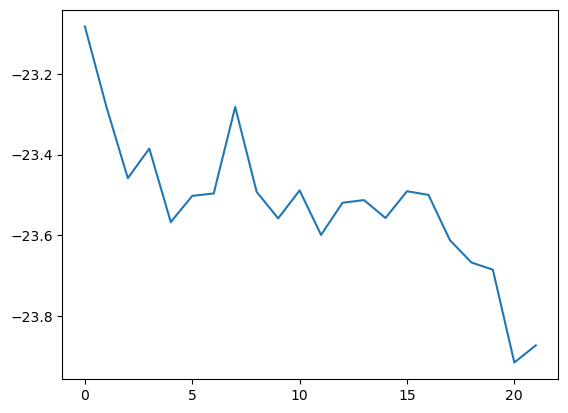

23/100


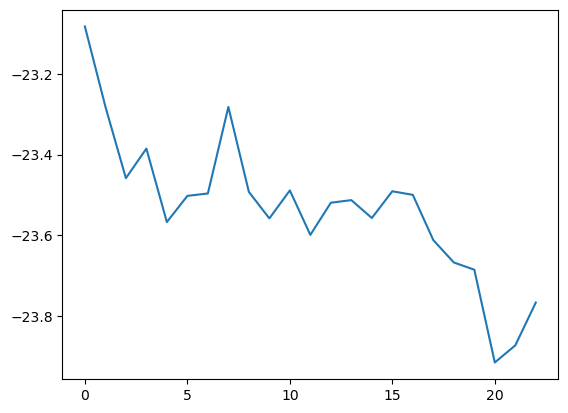

24/100


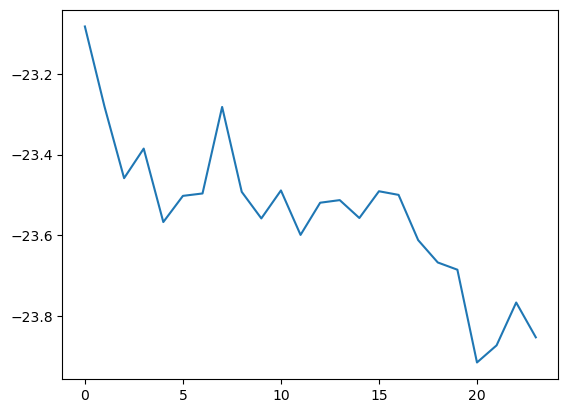

25/100


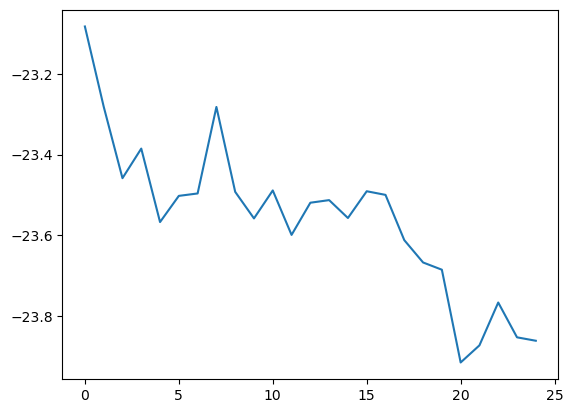

26/100


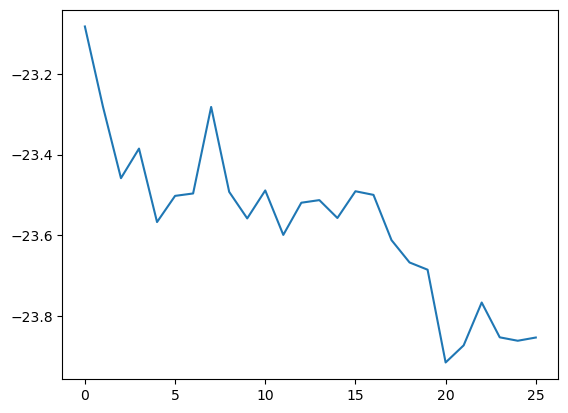

27/100


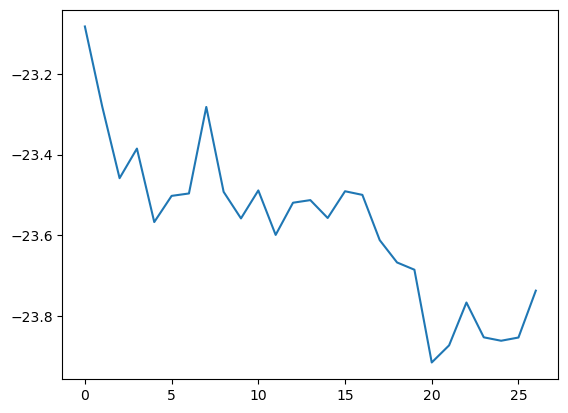

28/100


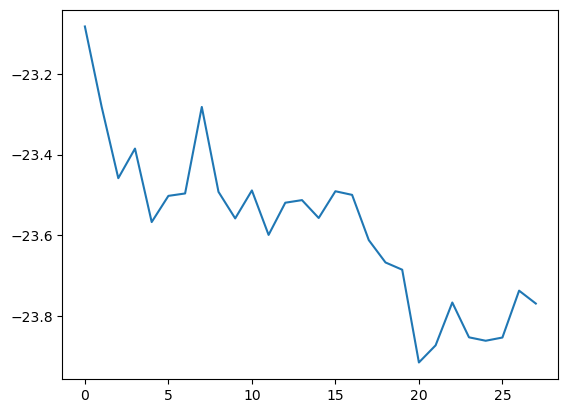

29/100


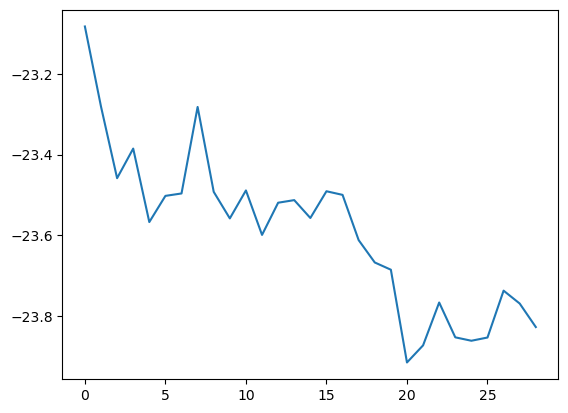

30/100


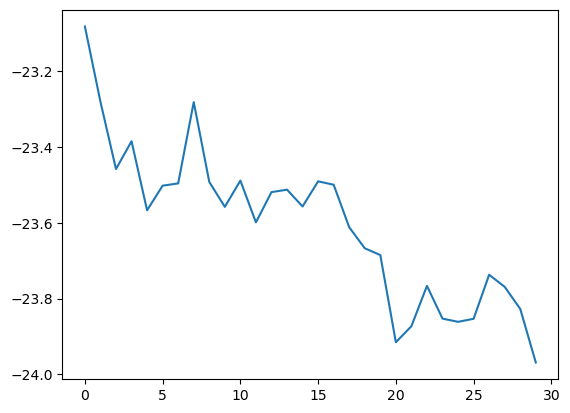

31/100


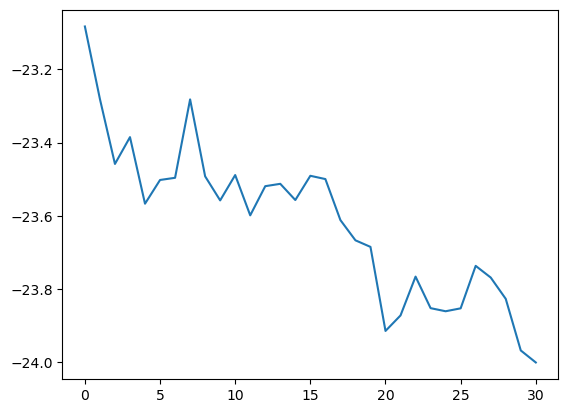

32/100


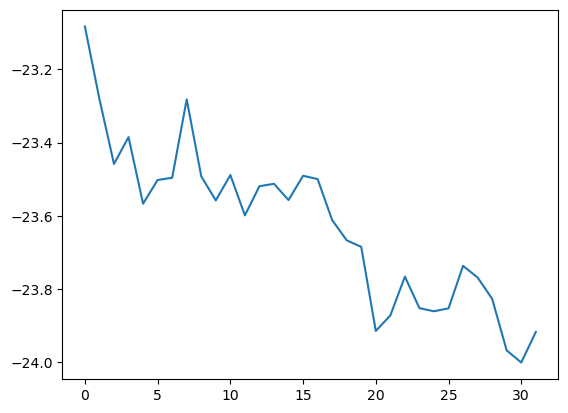

33/100


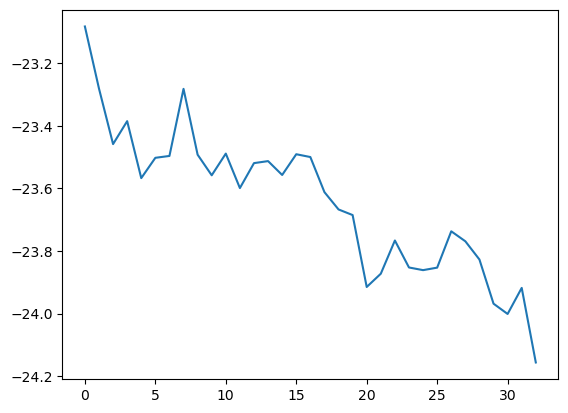

34/100


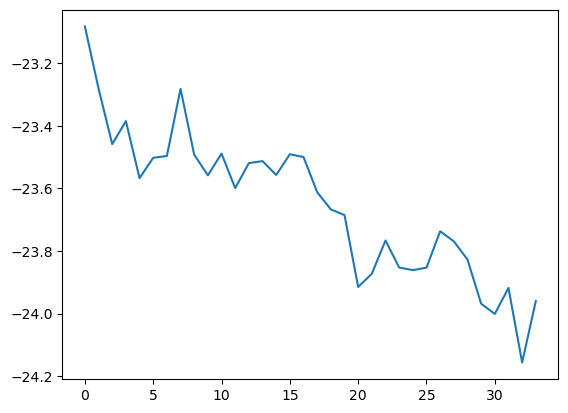

35/100


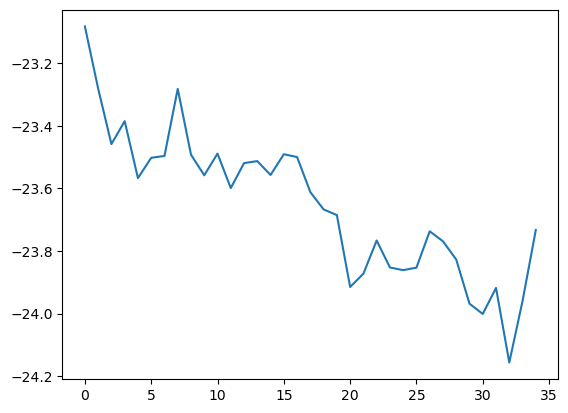

36/100


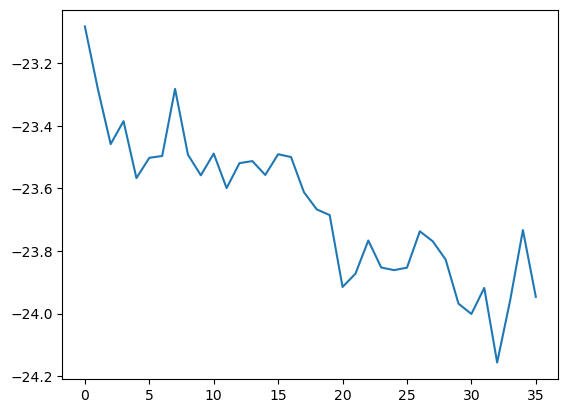

37/100


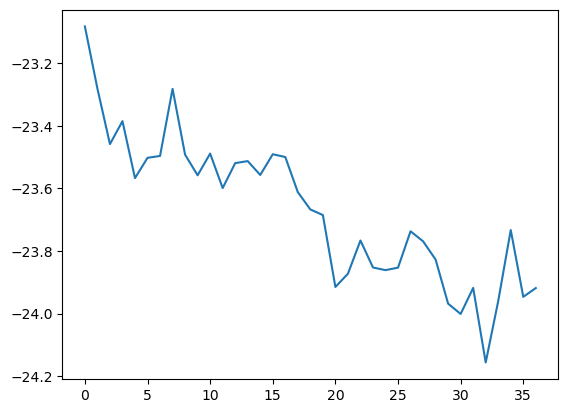

38/100


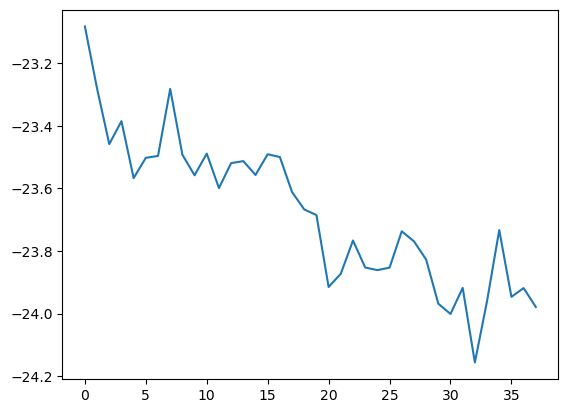

39/100


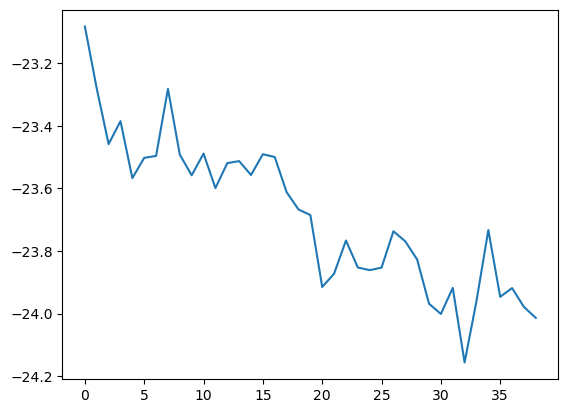

40/100


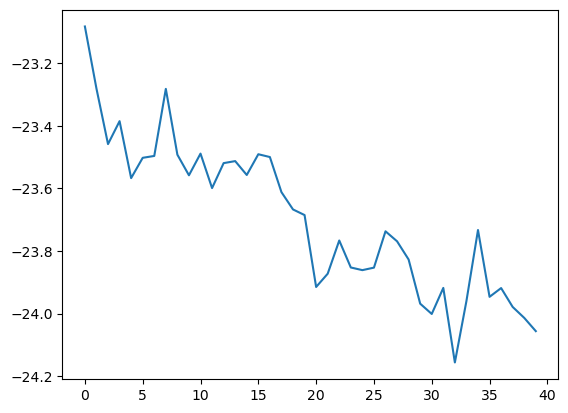

41/100


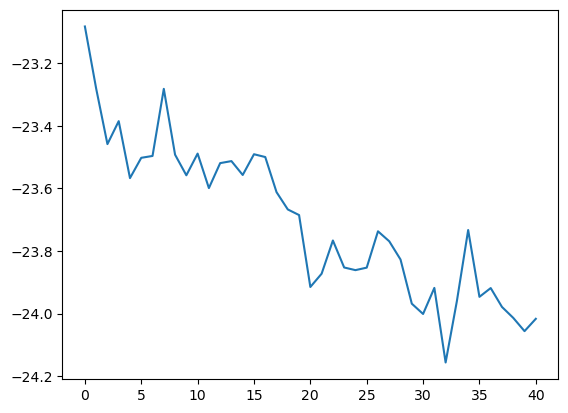

42/100


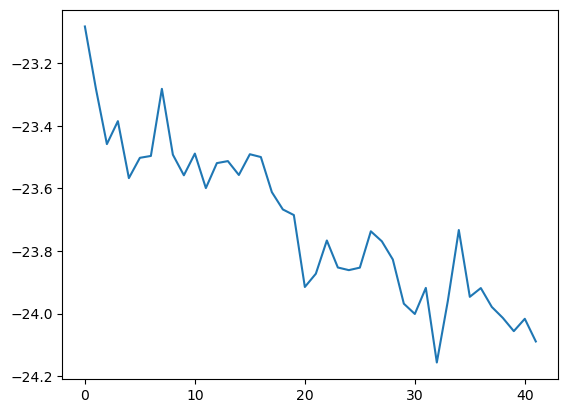

43/100


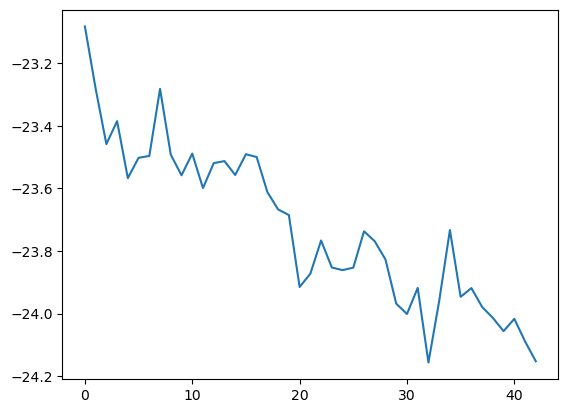

44/100


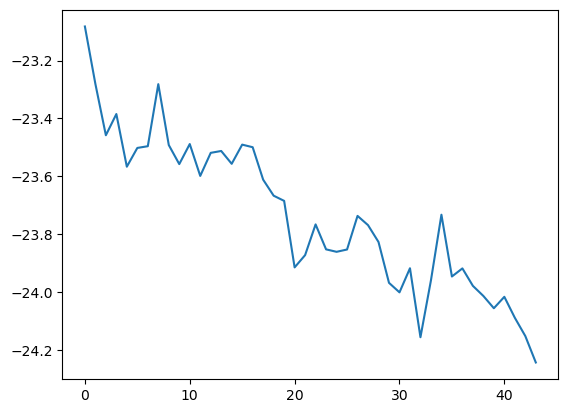

45/100


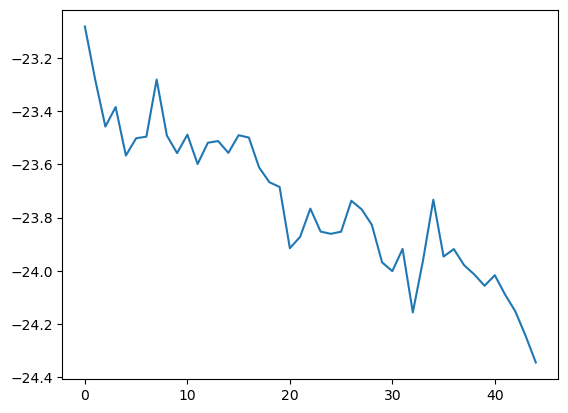

46/100


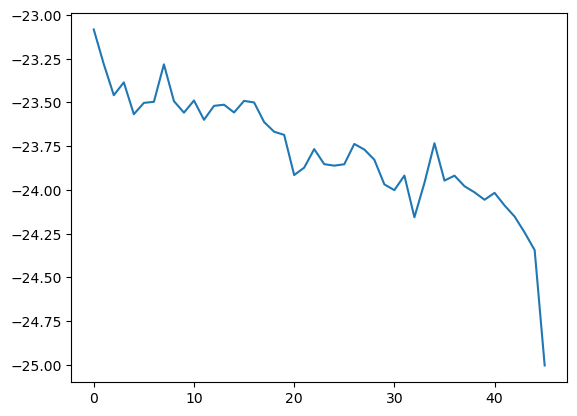

47/100


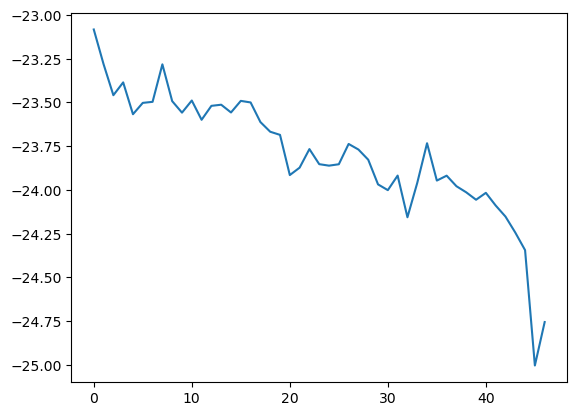

48/100


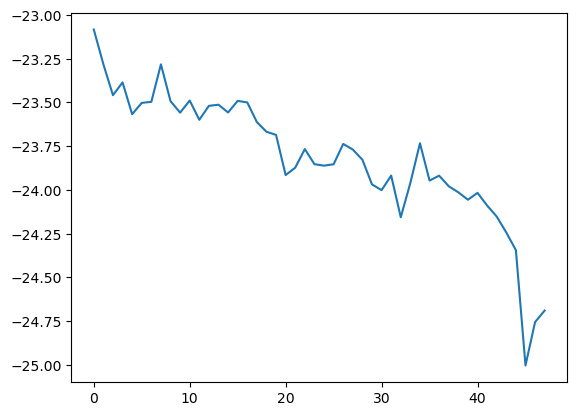

49/100


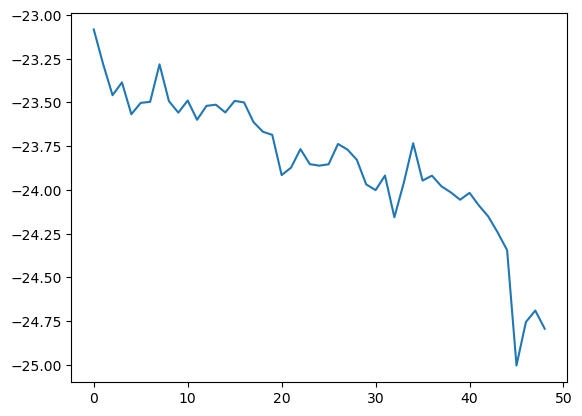

50/100


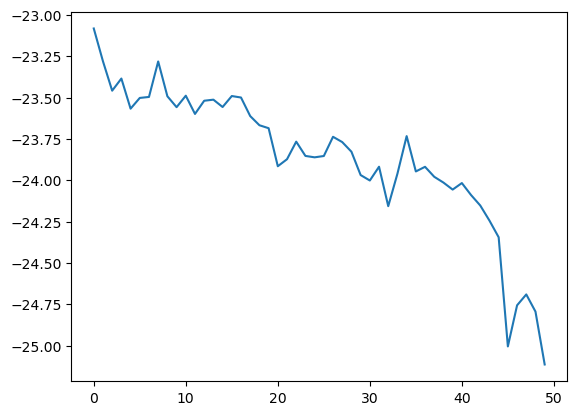

51/100


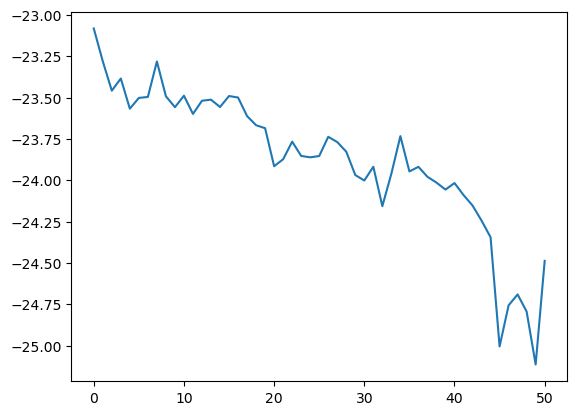

52/100


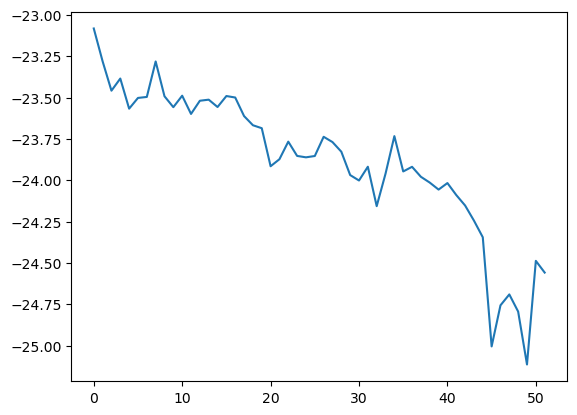

53/100


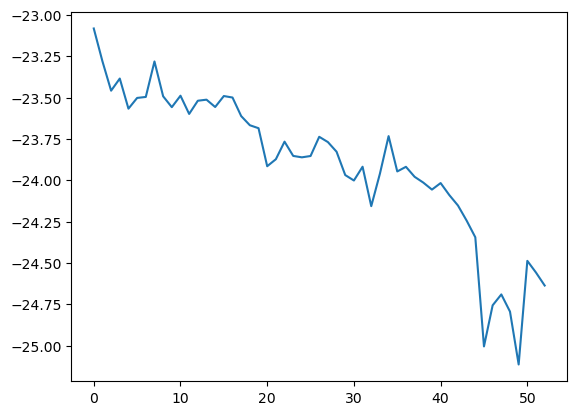

54/100


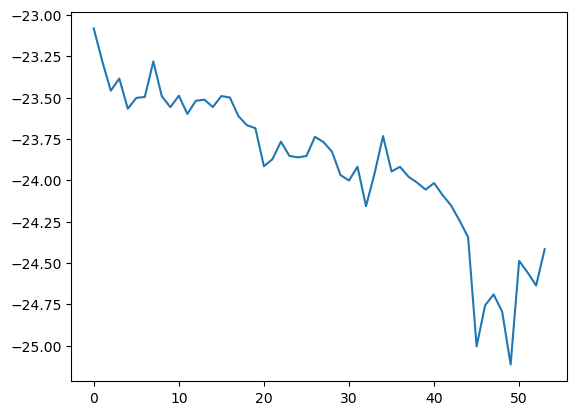

55/100


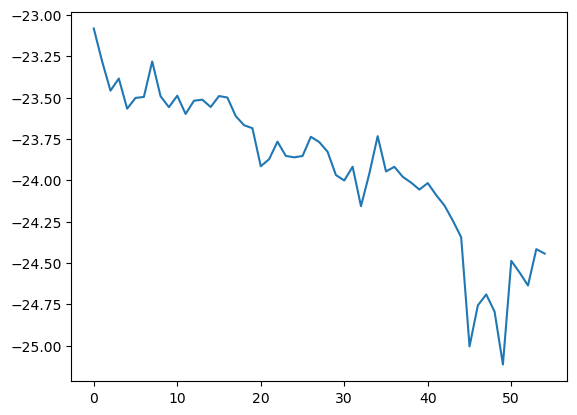

56/100


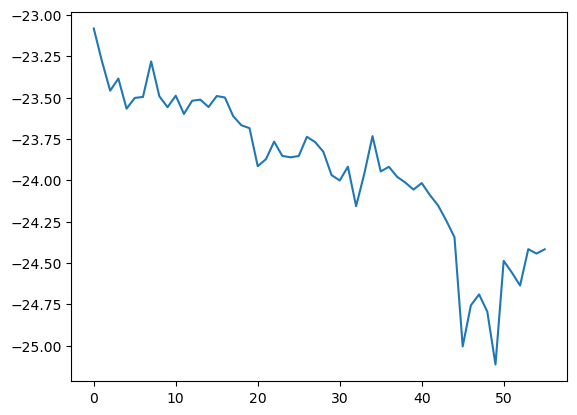

57/100


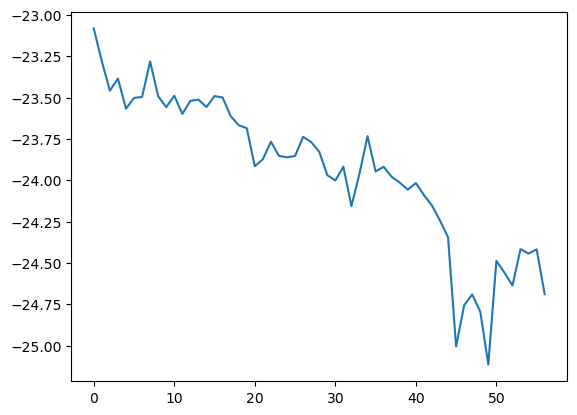

58/100


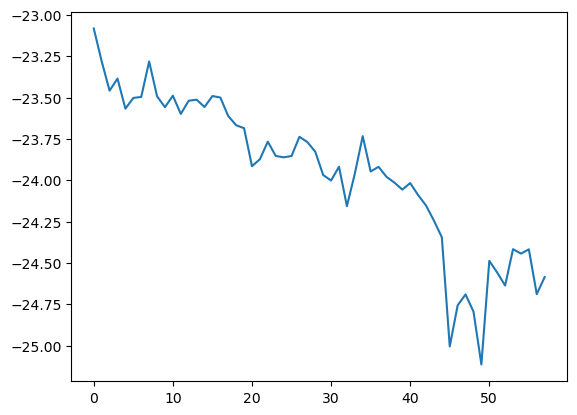

59/100


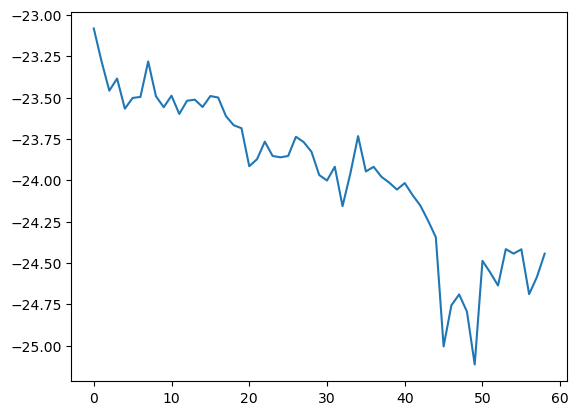

60/100


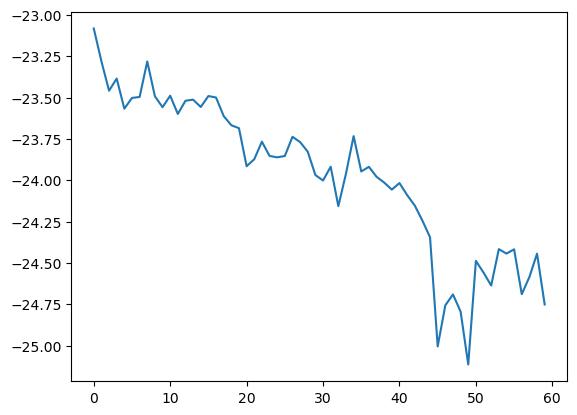

61/100


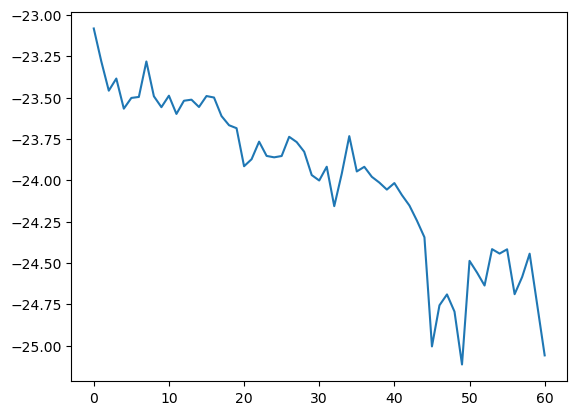

62/100


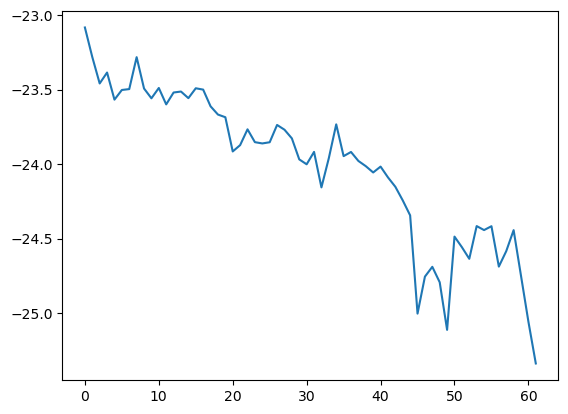

63/100


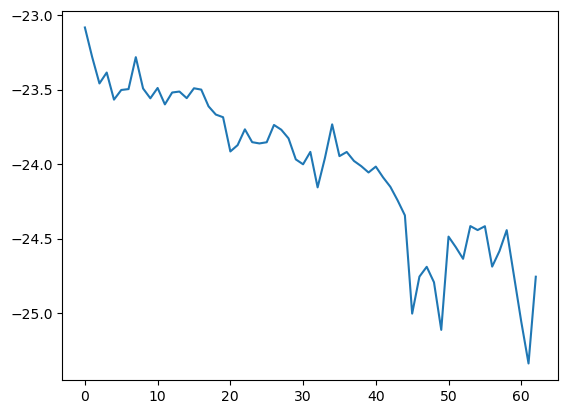

64/100


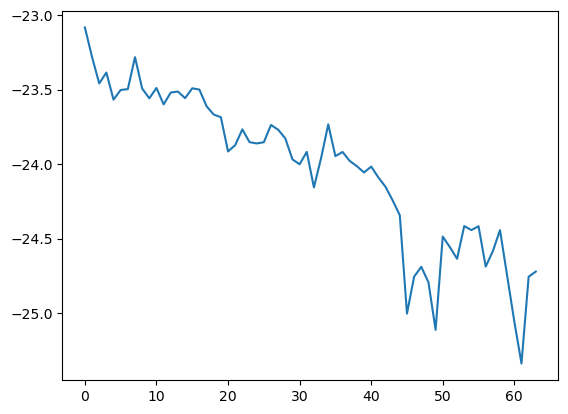

65/100


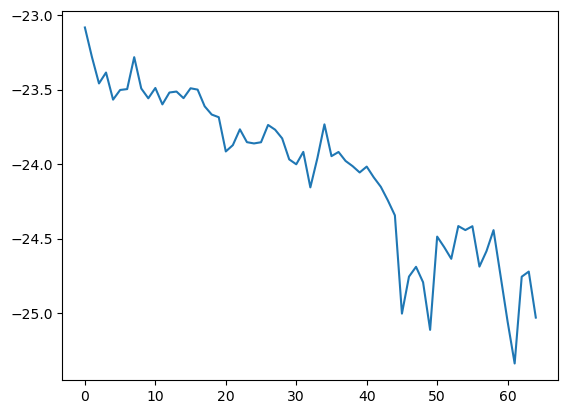

66/100


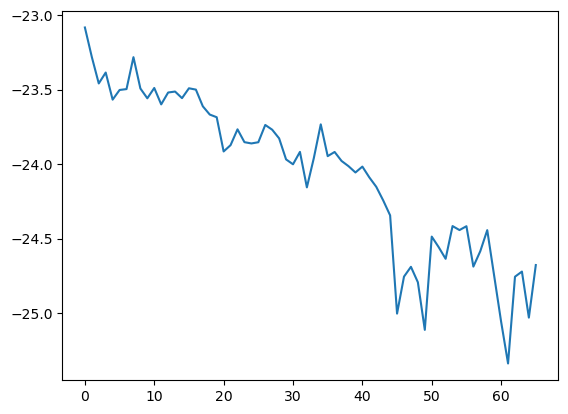

67/100


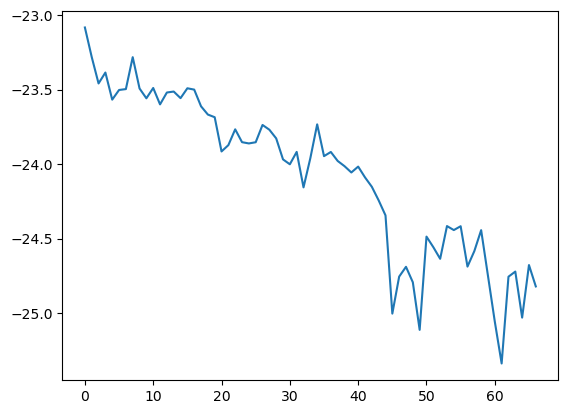

68/100


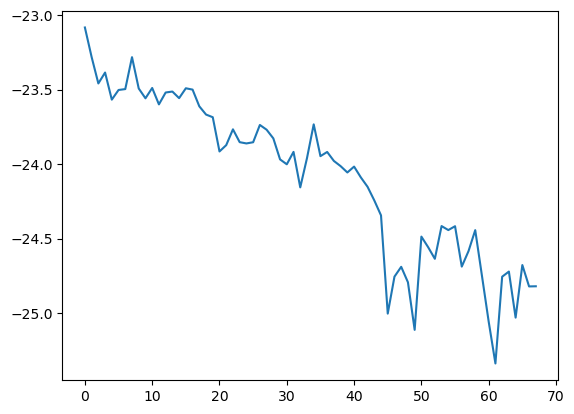

69/100


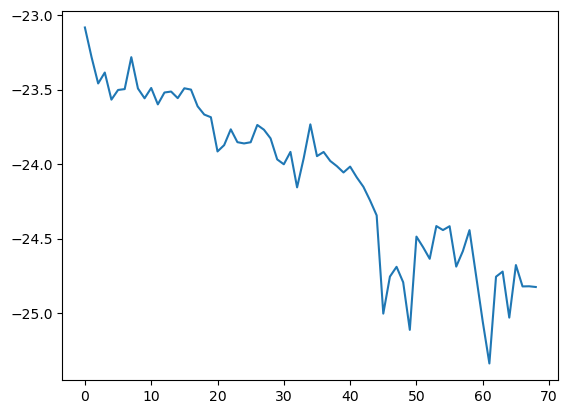

70/100


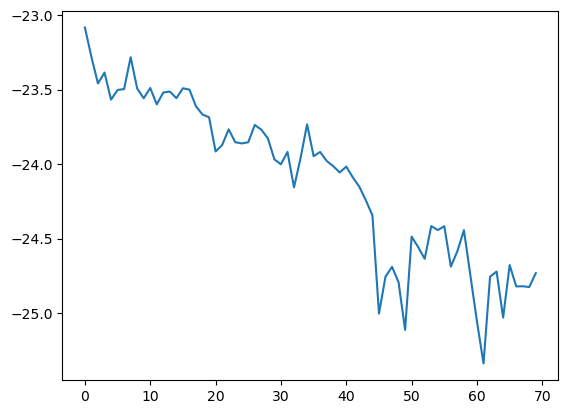

71/100


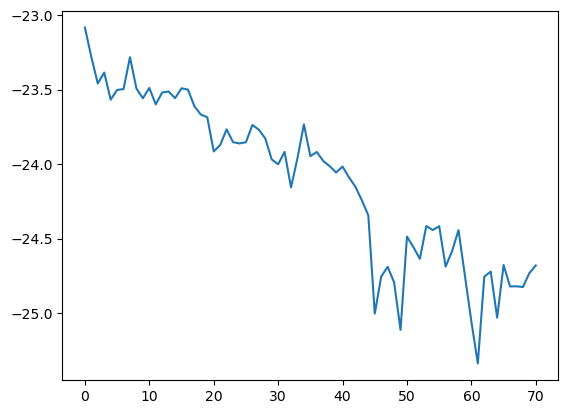

72/100


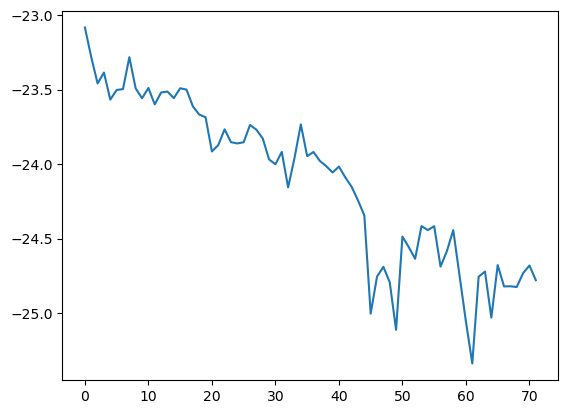

73/100


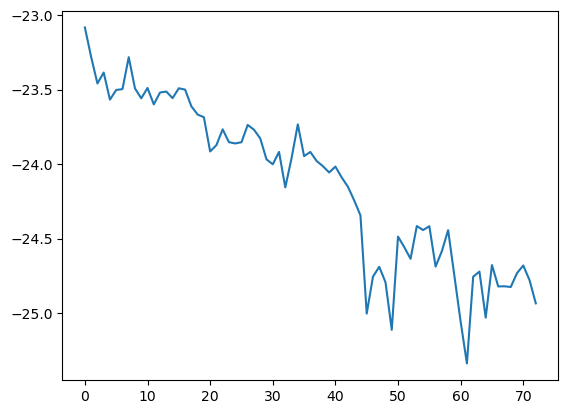

74/100


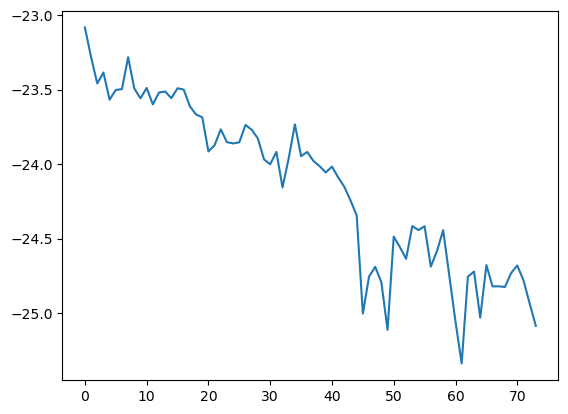

75/100


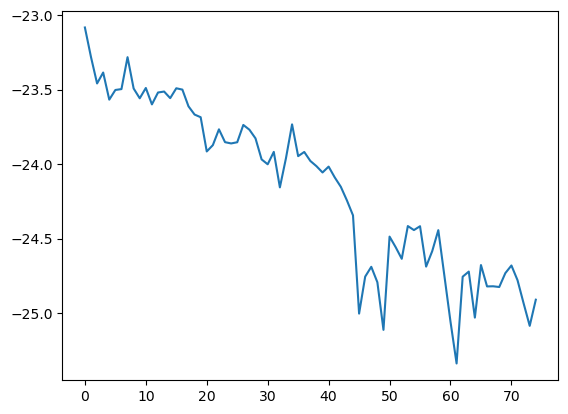

76/100


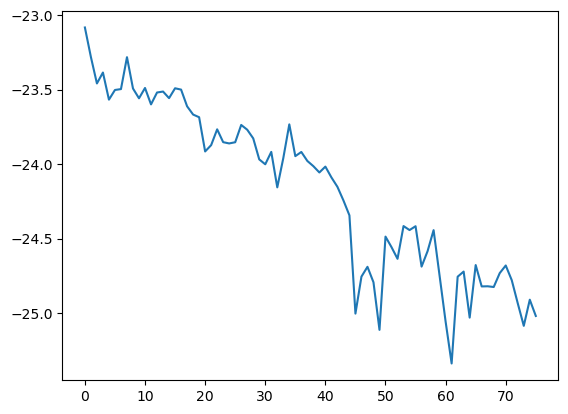

77/100


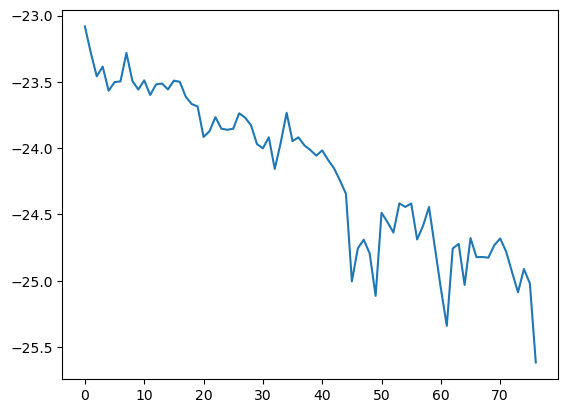

78/100


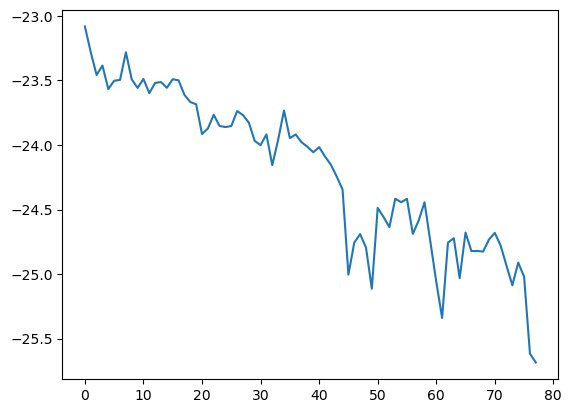

79/100


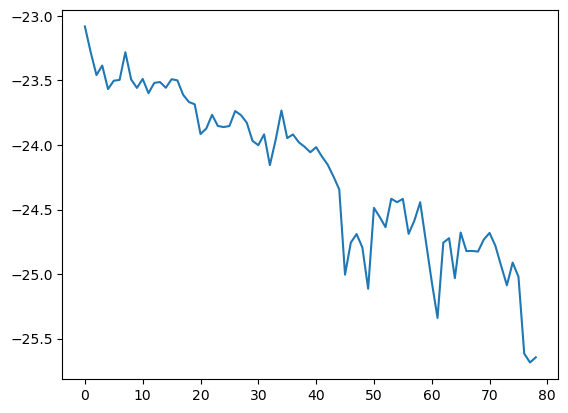

80/100


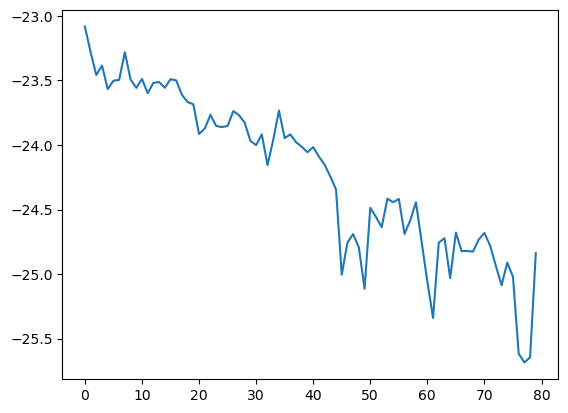

81/100


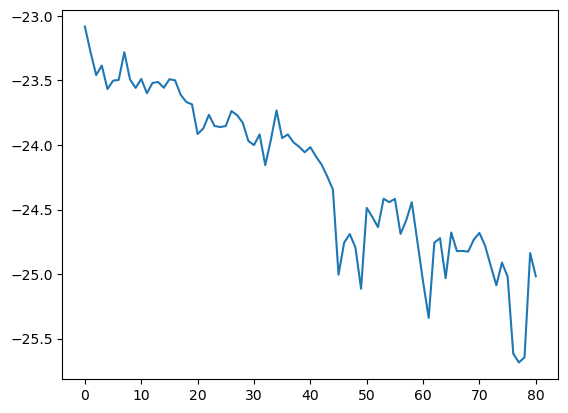

82/100


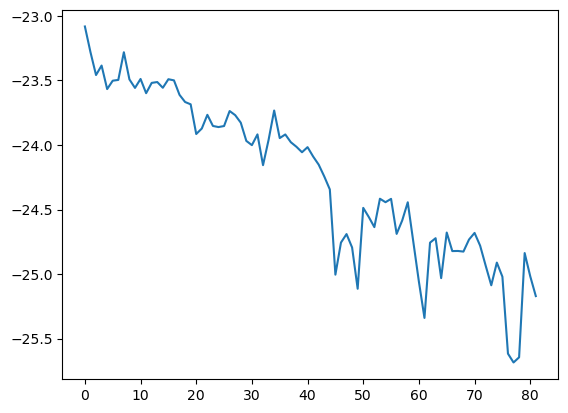

83/100


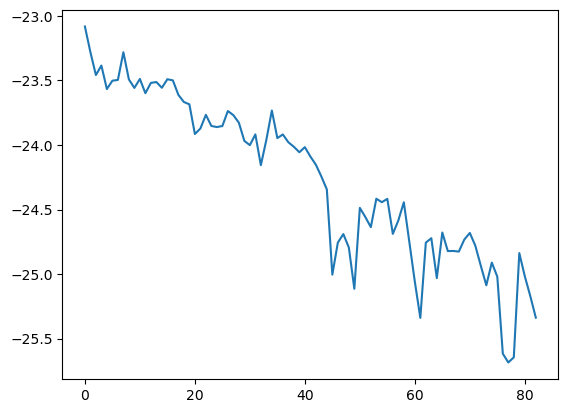

84/100


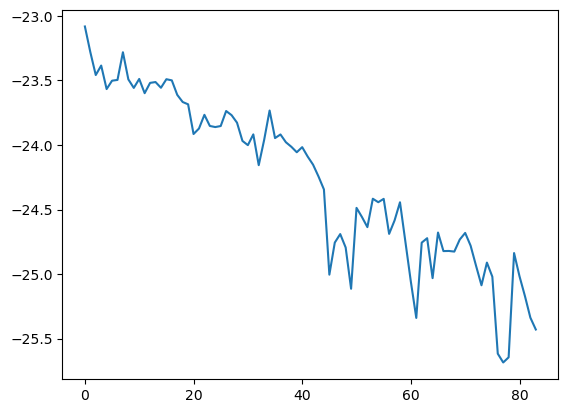

85/100


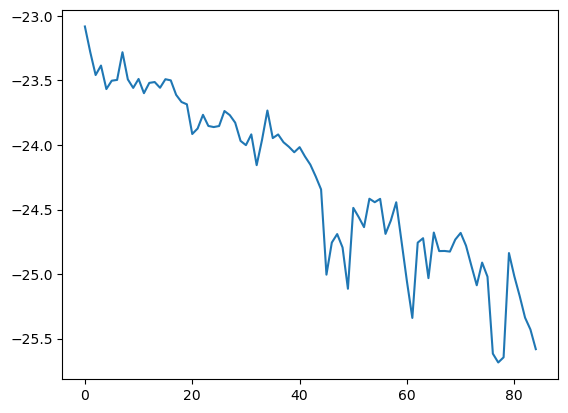

86/100


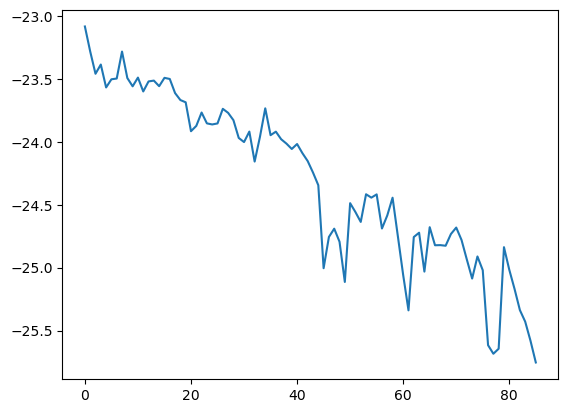

87/100


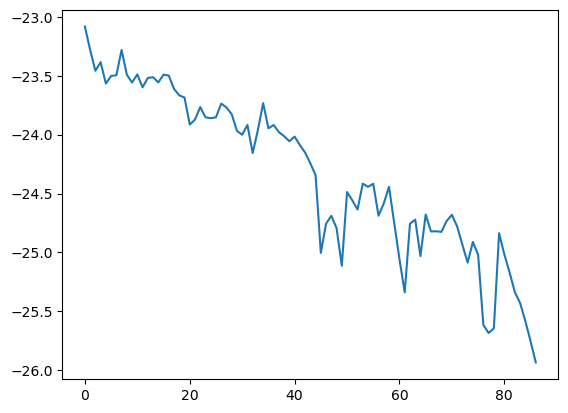

88/100


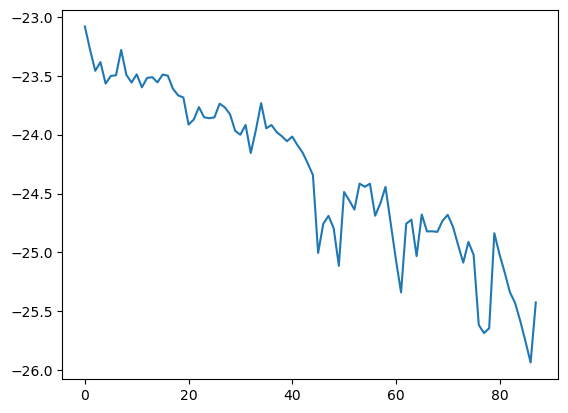

89/100


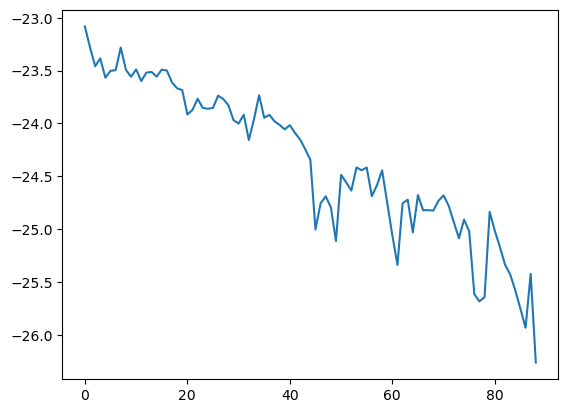

90/100


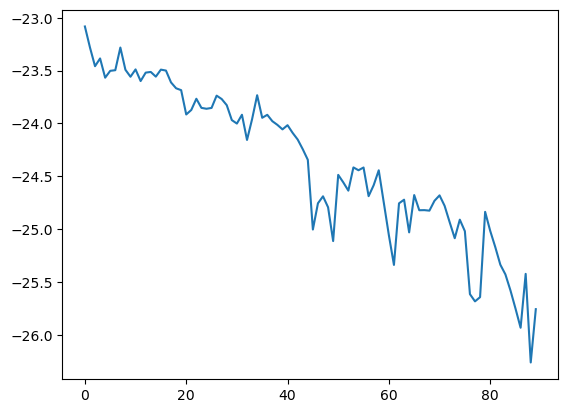

91/100


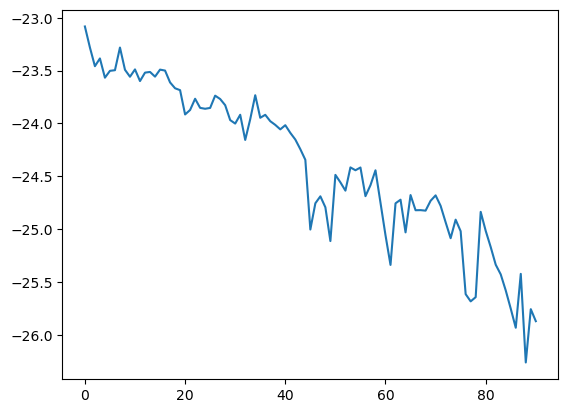

92/100


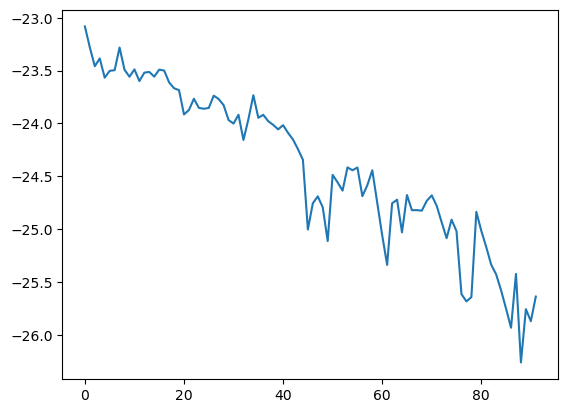

93/100


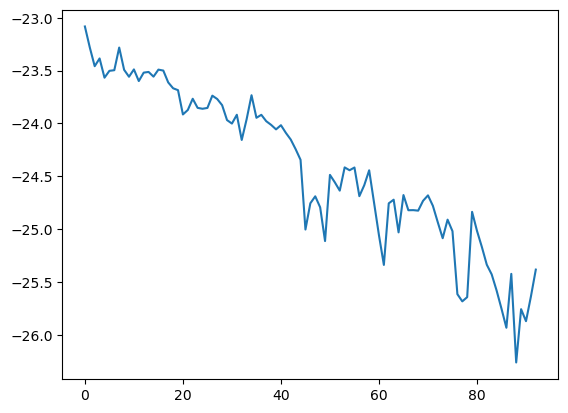

94/100


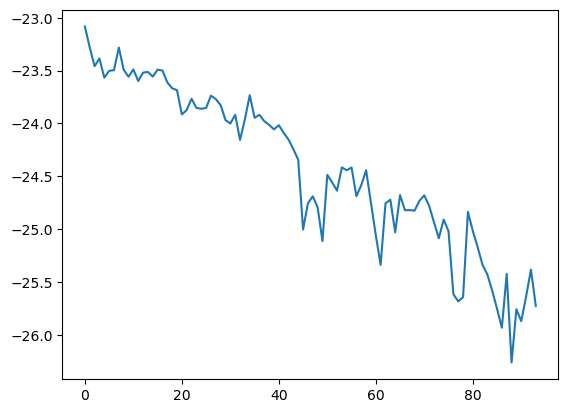

95/100


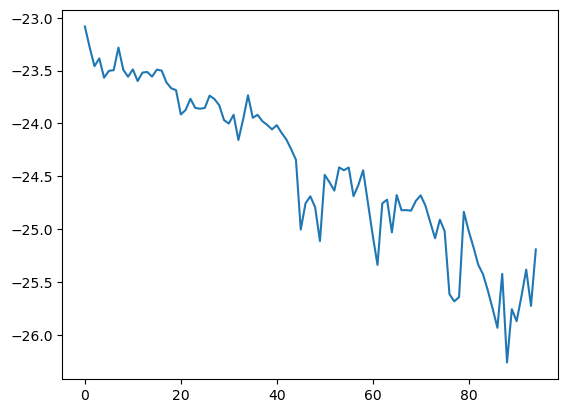

96/100


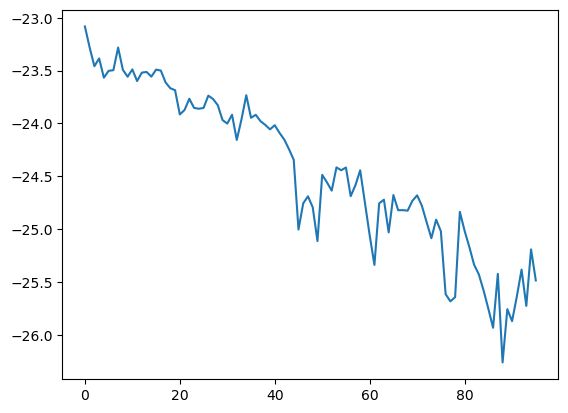

97/100


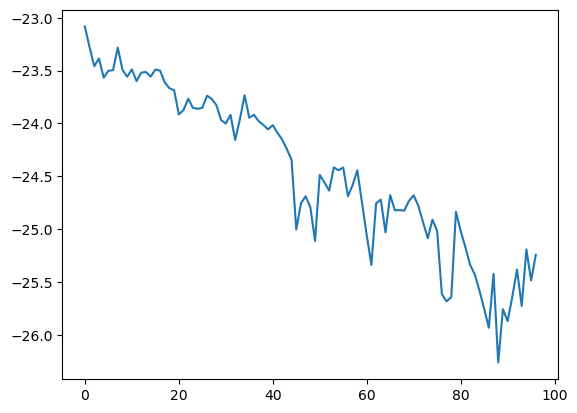

98/100


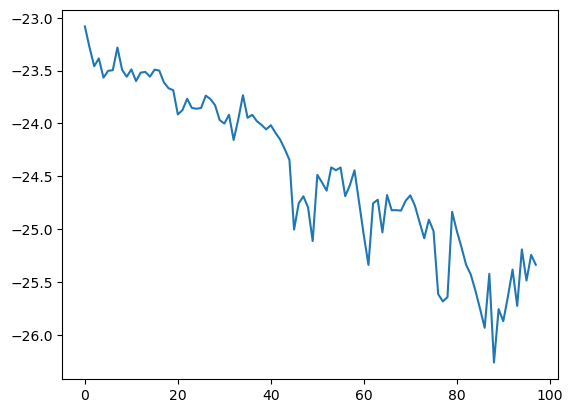

99/100


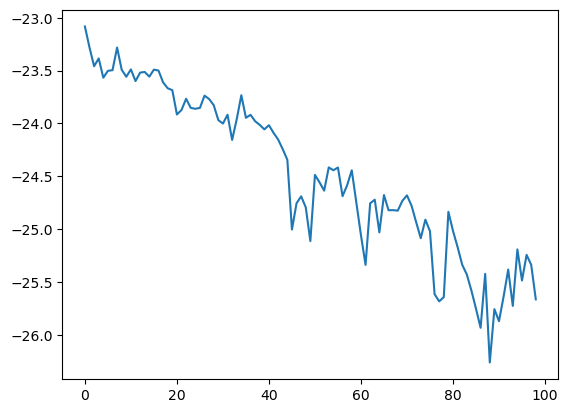

In [184]:
mat = produce_hamming_matrix(100, sweeps=40, max_k=100)

In [201]:
# with open("hamming_matrix.pkl", "wb") as fp:   #Pickling
#     pickle.dump(mat, fp)

with open("hamming_matrix.pkl", "rb") as fp:   # Unpickling
    mat = pickle.load(fp)

(100, 99)


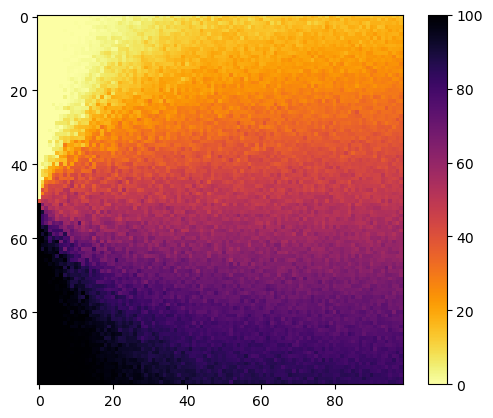

In [202]:
print(mat.shape)
plt.figure()
plt.imshow(mat, cmap='inferno_r')
plt.colorbar()
plt.show()